In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

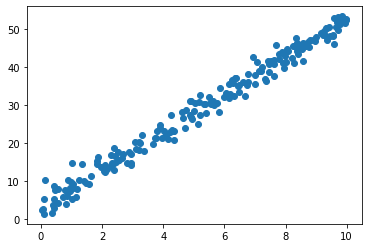

In [ ]:
n = 200

train_x = np.random.rand(n)*10
noise = np.random.randn(n)*2

train_y = 5*train_x + 3 + noise

plt.scatter(train_x, train_y)

In [ ]:
test_x = np.random.rand(n)*10
noise = np.random.randn(n)*2

test_y = 5*test_x + 3 + noise

In [ ]:
import torch.nn as nn

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))

    def forward(self, x):
        y = self.w * x + self.b
        return y


In [ ]:
net = LinearRegressor()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


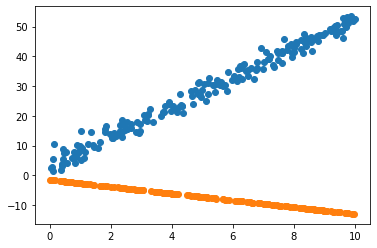

In [ ]:
plt.scatter(train_x, train_y)

# Convert numpy tensor into pytorch
test_x = torch.tensor(test_x)
y_ = net(test_x)


plt.scatter(test_x.detach().numpy(), y_.detach().numpy());

In [ ]:
import torch.optim as optim

net = LinearRegressor()
X = torch.tensor(train_x, dtype=torch.float32)
Y = torch.tensor(train_y, dtype=torch.float32)
num_epochs = 5
batch_size = 10
lr = 0.01

loss_fn = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)


for epoch in range(num_epochs):
    for (beg_i, end_i) in zip(range(0, len(X) - batch_size + 1, batch_size),
                              range(batch_size, len(X), batch_size)):
        optimizer.zero_grad()
        x = X[beg_i:end_i]
        y = Y[beg_i:end_i]

        y_ = net(x)
        loss = loss_fn(y_, y)
        loss.backward()
        optimizer.step()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


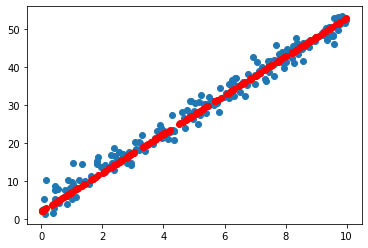

In [ ]:
plt.scatter(train_x, train_y)

# Convert numpy tensor into pytorch
test_x = torch.tensor(test_x)
y_ = net(test_x)


plt.scatter(test_x.detach().numpy(), y_.detach().numpy(), color="r");

### Exercise 3:

Write the code to predict the values at $x=[0.5, 5, 8.75]$ in a single model call.

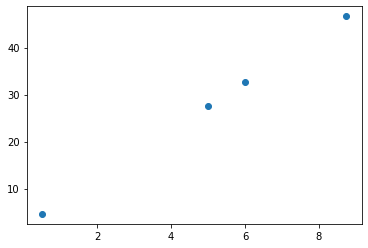

In [ ]:
h = net(torch.tensor([0.5, 5, 8.75, 6]))
plt.scatter([0.5, 5, 8.75, 6], h.detach().numpy());

# Logistic Regression

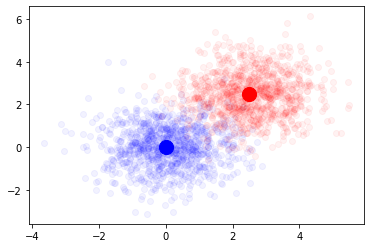

In [ ]:
n = 1000

class_0 = np.random.randn(n, 2)
class_1 = np.random.randn(n, 2) + 2.5

train_x = np.concatenate([class_0, class_1])
train_y = np.concatenate([np.zeros((n,)), np.ones((n,))])

plt.scatter(class_0[:, 0], class_0[:, 1], alpha=0.05, color="b")
plt.scatter(class_1[:, 0], class_1[:, 1], alpha=0.05, color="r")
plt.scatter([0], [0], s=200, color='blue')
plt.scatter([2.5], [2.5], s=200, color='red')

In [ ]:
print(train_y)

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        y = self.act(self.fc(x))
        return y

In [ ]:
import torch.optim as optim

net = LogisticRegressor()
X = torch.tensor(train_x, dtype=torch.float32)
Y = torch.tensor(train_y, dtype=torch.float32)
num_epochs = 5
batch_size = 10
lr = 0.01

loss_fn = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

for epoch in range(num_epochs):
    for (beg_i, end_i) in zip(range(0, len(X) - batch_size + 1, batch_size),
                              range(batch_size, len(X), batch_size)):
        optimizer.zero_grad()
        x = X[beg_i:end_i]
        y = Y[beg_i:end_i]

        y_ = net(x)
        loss = loss_fn(y_, y)
        loss.backward()
        optimizer.step()



/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [ ]:
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

def make_logistic_surface(logistic):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.set_title('Logistic regression probability surface. Blue dot: zero-class centroid. Orange dot: one-class centroid.')
  X = []
  y_coords = np.linspace(-4, 6, 100)
  x_coords = np.linspace(-4, 6, 100)
  for n in y_coords:
    for m in x_coords:
      X.append([n, m])
  X = torch.FloatTensor(X)
  Y_ = logistic(X)
  Y_ = Y_.data.numpy()
  sidx = 0
  surface = np.zeros((100, 100))
  xc, yc = np.meshgrid(x_coords, y_coords)
  for n in range(100):
    for m in range(100):
      surface[n, m] = Y_[sidx]
      sidx += 1

  surf = ax.plot_surface(xc, yc, surface, cmap=cm.coolwarm,
                         linewidth=0, antialiased=True,
                         alpha=0.5)
  _ = ax.scatter([0], [0], [0], s=200)
#   _ = ax.plot([0, 1e-3], [0, 1e-3], [0, 1], linewidth=3, color='blue')
  _ = ax.scatter([2.5], [2.5], [1], s=200)
  _ = ax.plot([2.5, 2.5 + 1e-3], [2.5, 2.5 + 1e-3], [0, 1], linewidth=3, color='red')
  

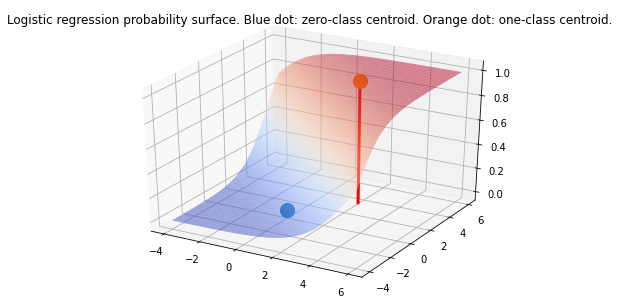

In [ ]:
make_logistic_surface(net)

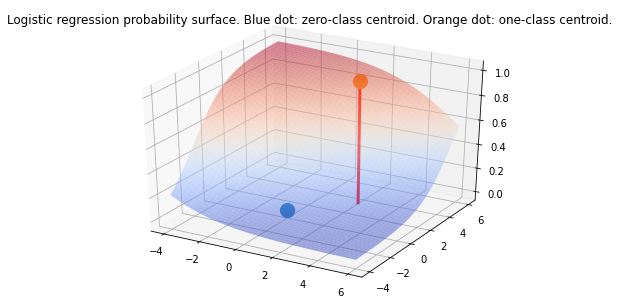

In [ ]:
net2 = LogisticRegressor()
make_logistic_surface(net2)
